In [29]:
import os
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

os.chdir(  "/Users/etmu9498/research/code/scripts")
import make_plots

In [30]:
crl_path = "/Users/etmu9498/research/data/CRL_data/2021"
crl_list = make_plots.load_crl( crl_path)
crl_name = crl_list[ 17]

os.chdir( crl_path)
data = xr.open_dataset( crl_name)
data

crl data files:
0) P3_20210811H1_200000-224759.cdf
1) P3_20210812H1_095513-125927.cdf
2) P3_20210812H2_212248-235510.cdf
3) P3_20210813H1_091801-113558.cdf
4) P3_20210816H1_085245-123459.cdf
5) P3_20210816H1_090000-102359.cdf
6) P3_20210817H1_094204-132058.cdf
7) P3_20210818H1_211425-244159.cdf
8) P3_20210819H1_213003-244159.cdf
9) P3_20210820H1_212402-245958.cdf
10) P3_20210821H2_213903-225658.cdf
11) P3_20210821H2_213903-262058.cdf
12) P3_20210827H1_203112-275220.cdf
13) P3_20210828H1_200115-221321.cdf
14) P3_20210829H1_171201-223719.cdf
15) P3_20210925H1_211201-243558.cdf
16) P3_20210926H1_220900-255058.cdf
17) P3_20210927H1_213003-253558.cdf
18) P3_20210929H2_211201-261159.cdf


<xarray.Dataset>
Dimensions:             (Time: 7322, layers: 594)
Dimensions without coordinates: Time, layers
Data variables:
    ProductionDateTime  |S24 ...
    VersionID           int16 ...
    Lon                 (Time) float32 ...
    Lat                 (Time) float32 ...
    H                   (layers) float32 ...
    time                (Time) float32 ...
    LSR                 (Time, layers) float32 ...
    WVMR                (Time, layers) float32 ...
    T                   (Time, layers) float32 ...
    P_ch1               (Time, layers) float32 ...
Attributes:
    global_att:    This file is generated with our Compact Raman lidar measur...
    global_att1:   The data for each flight is mapped to the same height bin ...
    global_att2:  For Question about this product, contact Zhien Wang, 
    global_att3:   University of Colorado, Boulder at zhien.wang@colorado.edu

C:\Users\etmu9498\Anaconda3\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)


-2.5007632
-108.383896
594
300
594
300
594
300
594
300
CPU times: total: 13.5 s
Wall time: 13.5 s


(24.5, 24.6)

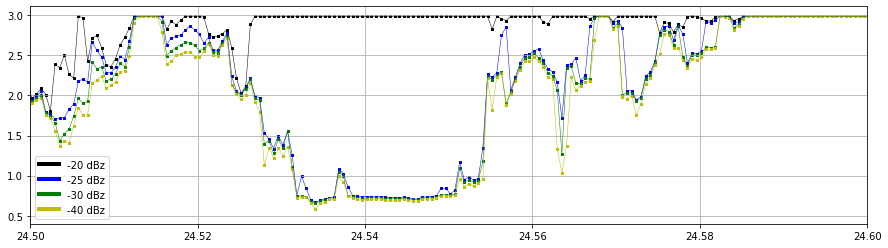

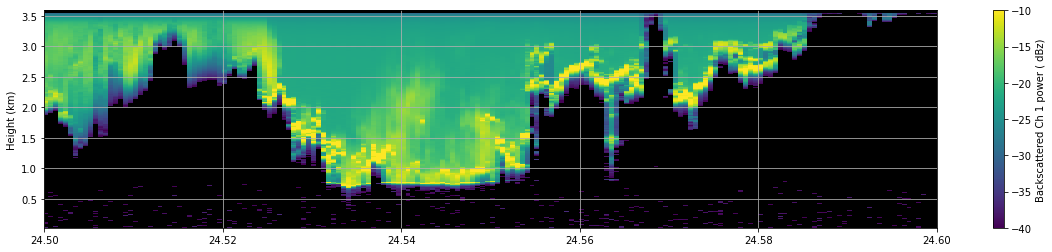

In [66]:
%%time

i1 = 5300 # 4700
i2 = 5600 # 6000

lon = data.Lon[ i1: i2]
lat = data.Lat[ i1: i2]
power = data.P_ch1[ i1: i2]
H = data.H
time = data.time[ i1: i2]


step1 = 10 * np.log10( power)
print( np.nanmax( step1.values))
print( np.nanmin( step1.values))


# start figure before for loop
plt.figure( figsize=(15, 4))
plt.grid('on')
plt.xlim( [24.5, 24.6])


# cycle through four different power cutoffs
cutoff_list = [ -20, -25, -30, -35]  # dBz
colors = ['k', 'b', 'g', 'y']
labels = [ '-20 dBz', '-25 dBz', '-30 dBz', '-40 dBz']

for i in range( len( cutoff_list)):

    step2 = step1.where( step1.values > cutoff_list[i])
    # range of power values after these two steps: between -.6 and -30 dBz
    power = step2.transpose()

    print( np.size( power, 0))
    print( np.size( power, 1))


    # lists to add time and height coords to specifying cloud top cutoffs
    power_limit_ht = []
    power_limit_time = []

    # iterate based on each x position value
    for i_x in range( np.size( power, 1)):
        # for each x value, search for the first value that didn't fit within the cutoff
        # skip the first 7 heights, as these values are nan due to the flight height of the aircraft
        for i_height in range( 100, np.size( power, 0)):
            if np.isnan( power[ i_height, i_x] ): 
                power_limit_ht.append( H[ i_height])
                power_limit_time.append( time[ i_x])
                break

    power_limit_ht = np.array( power_limit_ht)

    plt.scatter( power_limit_time, - power_limit_ht, c= colors[i], s=8, marker='s')
    plt.plot( power_limit_time, - power_limit_ht, c= colors[i], linewidth=.5, label= labels[i])

leg = plt.legend()
for line in leg.get_lines():
    line.set_linewidth(4.0)

plt.figure( figsize=(20, 4))
make_plots.plot_power_ch1( crl_path, crl_name, i1, i2, 'time')
plt.xlim( [24.5, 24.6])

(24.5, 24.6)

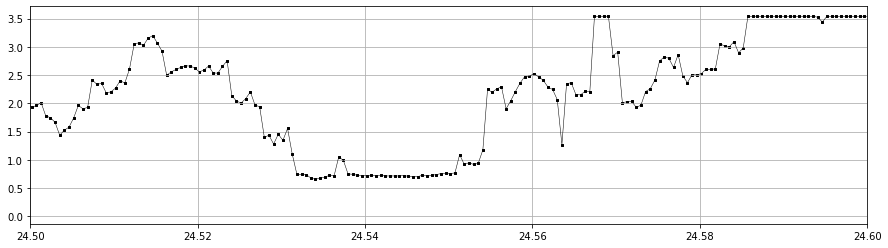

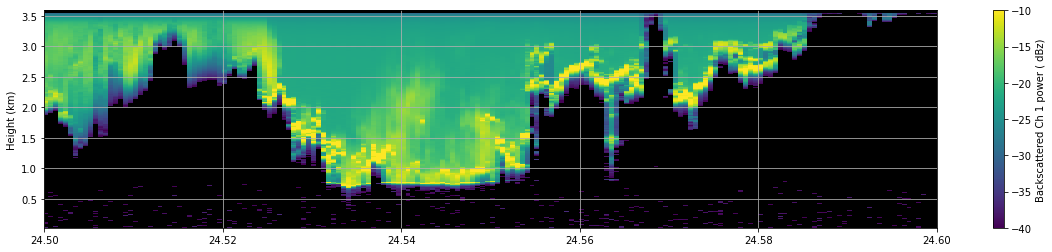